In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [382]:
df = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv")

In [383]:
df.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [384]:
dfCol = df[df["Country"] == "Colombia"]
dfCol

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
54,Colombia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,393,0,0,0


In [385]:
dfCol = dfCol.drop(["Country"], axis=1)
dfCol

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,393,0,0,0


In [386]:
dfCol = dfCol.T
dfCol

,54
2022-01-31,0
2022-02-17,0
2022-02-28,0
2022-03-04,0
2022-03-31,0
...,...
2022-09-18,0
2022-09-19,393
2022-09-20,0
2022-09-21,0


In [387]:
dfCol.columns = ["casos_diarios"]
dfCol

,casos_diarios
2022-01-31,0
2022-02-17,0
2022-02-28,0
2022-03-04,0
2022-03-31,0
...,...
2022-09-18,0
2022-09-19,393
2022-09-20,0
2022-09-21,0


In [388]:
dfCol = dfCol.iloc[13:141,:]
dfCol

,casos_diarios
2022-05-17,0
2022-05-18,0
2022-05-19,0
2022-05-20,0
2022-05-21,0
...,...
2022-09-18,0
2022-09-19,393
2022-09-20,0
2022-09-21,0


In [389]:
dfCol.describe()

,casos_diarios
count,128.000000
mean,12.914062
std,61.382758
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,393.000000


<AxesSubplot:>

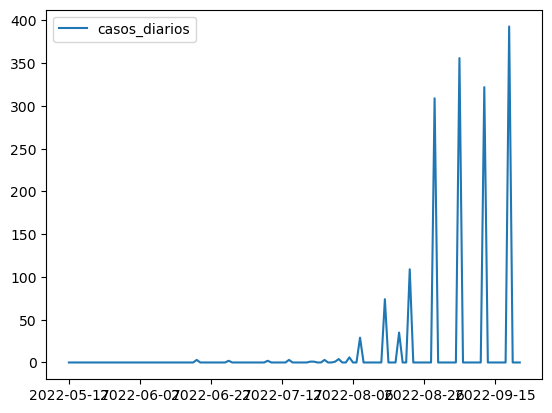

In [390]:
dfCol.plot()

Trabajando con Numpy

In [391]:
y = dfCol["casos_diarios"].values
y.size #Representa el número de casos por dias.

128

In [554]:
memoria = 0;
yn = np.array([])
for i in np.linspace(0, y.size-1, y.size):
        x = (i)%4
        if x == 0:
            media = np.mean(y[memoria:int(i)])
            #print(media)
            memoria = int(i)
            yn = np.append(yn, media)
            
yn = yn[9:yn.size]
yn[yn.size-1] = (y[y.size-4])/4
print(yn, yn.shape)
y = yn

[ 0.    0.75  0.    0.5   0.    0.    0.5   0.75  0.    0.5   1.    2.5
  7.25  0.   18.5   8.75 27.25 77.25  0.   89.    0.   80.5  98.25] (23,)


In [553]:
def interpolacion_lineal(x, fx1, fx2, x1, x2):
    interpolacion = fx1 + ((fx2-fx1)/(x2-x1))*(x-x1)
    return interpolacion

In [564]:
y[2] = interpolacion_lineal(x = 2, fx1=y[1], fx2=y[3], x1=1, x2=3)
y[4] = interpolacion_lineal(x = 4, fx1=y[3], fx2=y[5], x1=3, x2=5)
y[8] = interpolacion_lineal(x = 8, fx1=y[7], fx2=y[9], x1=7, x2=9)
y[13] = interpolacion_lineal(x = 13, fx1=y[12], fx2=y[14], x1=12, x2=14)
y[18] = interpolacion_lineal(x = 18, fx1=y[17], fx2=y[19], x1=17, x2=19)
y[20] = interpolacion_lineal(x = 20, fx1=y[19], fx2=y[21], x1=19, x2=21)
print(y, y.shape)

[ 0.     0.75   0.625  0.5    0.25   0.     0.5    0.75   0.625  0.5
  1.     2.5    7.25  12.875 18.5    8.75  27.25  77.25  83.125 89.
 84.75  80.5   98.25 ] (23,)


In [565]:
X = np.linspace(1, 23, 23)
X #Representa cada 4 dias

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [566]:
X.shape

(23,)

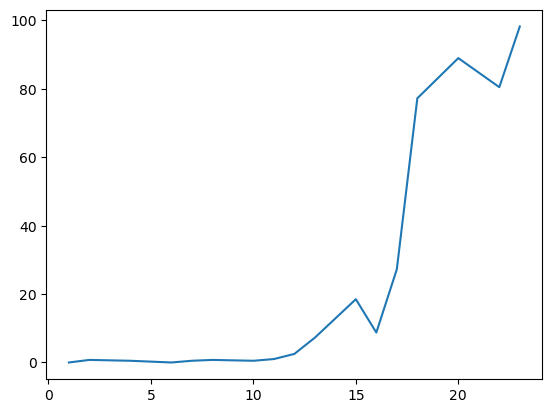

In [567]:
plt.plot(X,y)

(array([14.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  3.,  2.]),
 array([ 0.   ,  9.825, 19.65 , 29.475, 39.3  , 49.125, 58.95 , 68.775,
        78.6  , 88.425, 98.25 ]),
 <BarContainer object of 10 artists>)

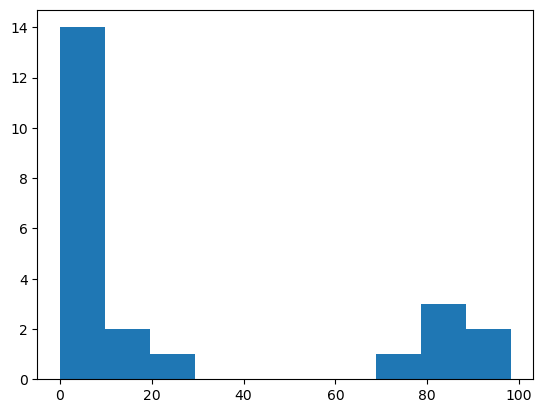

In [568]:
plt.hist(y, bins=10, density=False)

<StemContainer object of 3 artists>

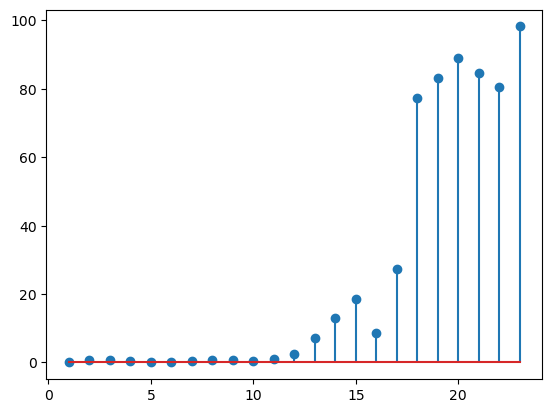

In [569]:
plt.stem(X,y)

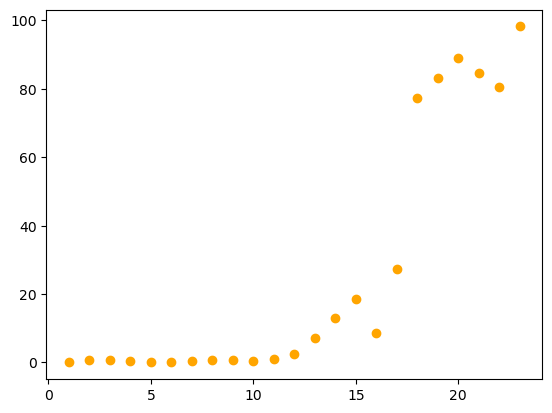

In [570]:
plt.scatter(X,y, color='orange')

In [571]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [572]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec


In [573]:
mm = MinMaxScaler()
y = y.reshape(-1,1)
mm_y = mm.fit_transform(y)
origin_data = mm.inverse_transform(mm_y)
print('data is ',y)
print('after Min Max ',mm_y)
print('origin data is ',origin_data)

data is  [[ 0.   ]
 [ 0.75 ]
 [ 0.625]
 [ 0.5  ]
 [ 0.25 ]
 [ 0.   ]
 [ 0.5  ]
 [ 0.75 ]
 [ 0.625]
 [ 0.5  ]
 [ 1.   ]
 [ 2.5  ]
 [ 7.25 ]
 [12.875]
 [18.5  ]
 [ 8.75 ]
 [27.25 ]
 [77.25 ]
 [83.125]
 [89.   ]
 [84.75 ]
 [80.5  ]
 [98.25 ]]
after Min Max  [[0.        ]
 [0.00763359]
 [0.00636132]
 [0.00508906]
 [0.00254453]
 [0.        ]
 [0.00508906]
 [0.00763359]
 [0.00636132]
 [0.00508906]
 [0.01017812]
 [0.02544529]
 [0.07379135]
 [0.13104326]
 [0.18829517]
 [0.08905852]
 [0.27735369]
 [0.78625954]
 [0.84605598]
 [0.90585242]
 [0.86259542]
 [0.81933842]
 [1.        ]]
origin data is  [[ 0.   ]
 [ 0.75 ]
 [ 0.625]
 [ 0.5  ]
 [ 0.25 ]
 [ 0.   ]
 [ 0.5  ]
 [ 0.75 ]
 [ 0.625]
 [ 0.5  ]
 [ 1.   ]
 [ 2.5  ]
 [ 7.25 ]
 [12.875]
 [18.5  ]
 [ 8.75 ]
 [27.25 ]
 [77.25 ]
 [83.125]
 [89.   ]
 [84.75 ]
 [80.5  ]
 [98.25 ]]


In [574]:
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, mm_y, 
                                                    random_state = 10)

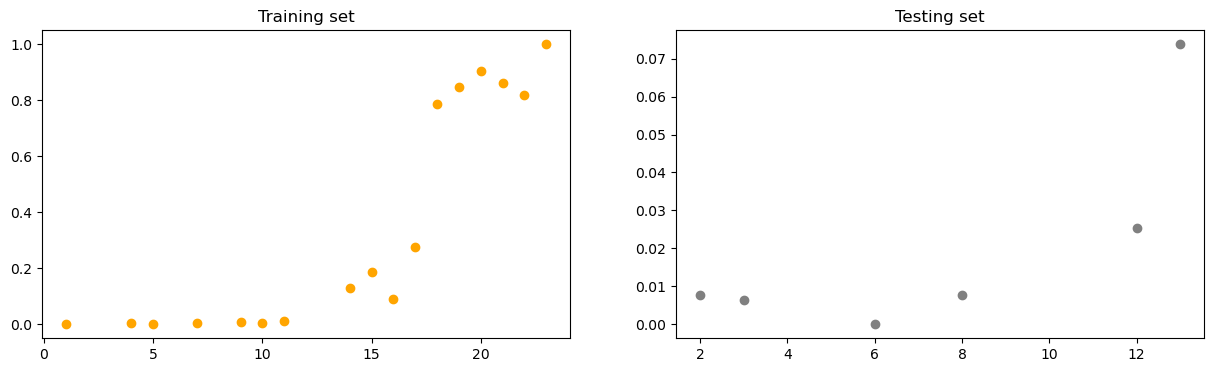

In [575]:
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].set_title('Training set')

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].set_title('Testing set')

plt.show()

Regresion_lineal

In [576]:
RGL = linear_model.LinearRegression()  #Instancia de LinearRegresion
RGL.fit(X_train, y_train)   #Entrenar el modelo

LinearRegression()

In [577]:
y_train_prediccion = RGL.predict(X_train)  #Realizar predicciones
y_test_prediccion = RGL.predict(X_test)

Regresor los datos a valores antes de la normalizacion

In [578]:
y_train = mm.inverse_transform(y_train)
y_test = mm.inverse_transform(y_test)
y_train_prediccion = mm.inverse_transform(y_train_prediccion)
y_test_prediccion = mm.inverse_transform(y_test_prediccion)

Obtener la calidad del modelo

In [579]:
train_MSD = mean_squared_error(y_train, y_train_prediccion)
test_MSD = mean_squared_error(y_test, y_test_prediccion)
print(train_MSD)
print(test_MSD)

403.1469382641338
364.93682473265727


In [580]:
r2 = RGL.score(X.reshape(-1,1), mm_y)
r2

0.6994203898630802

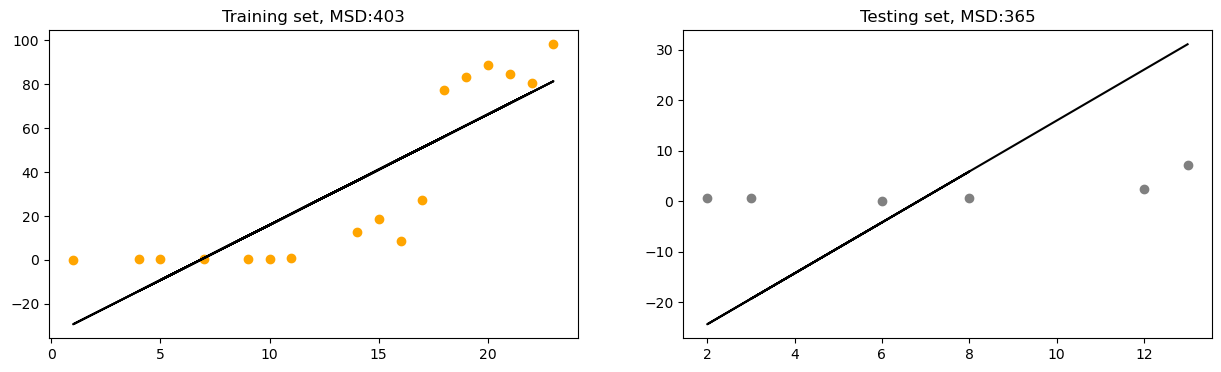

In [581]:
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_prediccion, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_prediccion, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

In [584]:
prueba = np.array([24])
prueba = prueba.reshape(1,-1)
pred = RGL.predict(prueba)
print(pred)
pred = pred.reshape(1,-1)
pred = mm.inverse_transform(pred)
print(pred)
print(pred*4)

[[0.87997295]]
[[86.45734207]]
[[345.82936827]]


In [585]:
RGL.coef_

array([[0.05124623]])

In [586]:
RGL.intercept_

array([-0.34993658])

# Regresion polinomica

In [587]:
from sklearn.preprocessing import PolynomialFeatures

In [588]:
pf = PolynomialFeatures(degree = 5)   #Vamos a usar un polinomio de grado 3
X2 = pf.fit_transform(X)  #Transformamos la entrada a Polinomyal

In [589]:
RGLP = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X2, mm_y, 
                                                    random_state = 10)
RGLP.fit(X_train,y_train)

LinearRegression()

In [590]:
y_train_prediccion = RGLP.predict(X_train)  #Realizar predicciones
y_test_prediccion = RGLP.predict(X_test)

In [591]:
y_train = mm.inverse_transform(y_train)
y_test = mm.inverse_transform(y_test)
y_train_prediccion = mm.inverse_transform(y_train_prediccion)
y_test_prediccion = mm.inverse_transform(y_test_prediccion)

In [592]:
train_MSD = mean_squared_error(y_train, y_train_prediccion)
test_MSD = mean_squared_error(y_test, y_test_prediccion)
print(train_MSD)
print(test_MSD)

97.79526067029917
6.502726375942963


In [593]:
r2 = RGLP.score(X2, mm_y)
r2

0.9434435209792242

In [594]:
print('w = ' + str(RGLP.coef_) + ', b = ' + str(RGLP.intercept_))

w = [[ 0.00000000e+00 -9.25931893e-02  3.55951992e-02 -5.14913012e-03
   3.03919383e-04 -5.94495405e-06]], b = [0.05963331]


In [595]:
y_new = RGLP.predict(X2)
y_new = mm.inverse_transform(y_new)

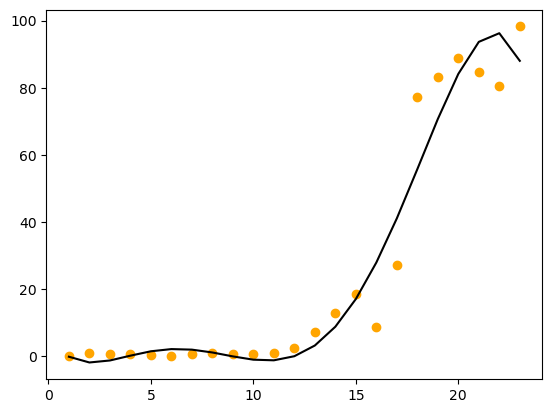

In [596]:
plt.scatter(X, y,  color='orange')
plt.plot(X, y_new, color='black')
#axs.set_title('Todos los datos')

In [608]:
prueba = np.array([24]).reshape(1,-1)
prueba= pf.fit_transform(prueba)  #Transformamos la entrada a Polinomyal
pred = RGLP.predict(prueba)
print(pred)
pred = mm.inverse_transform(pred)
print(pred)
print(pred*4)

[[0.65438024]]
[[64.29285837]]
[[257.17143346]]


# K-vecinos mas cercanos

In [629]:
from sklearn import neighbors

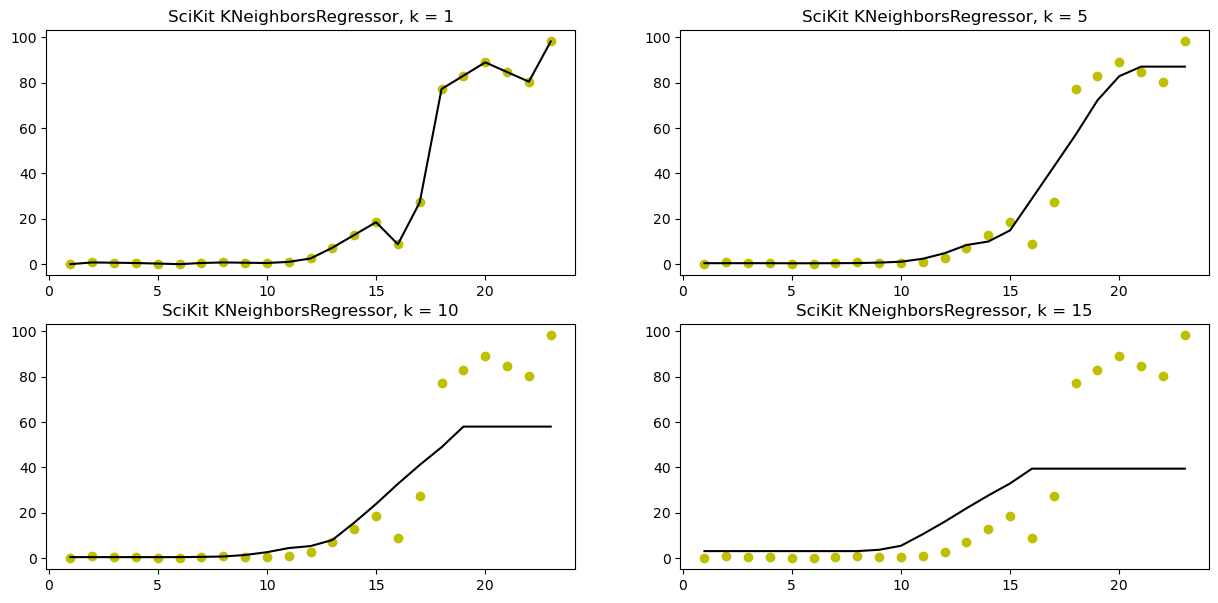

In [630]:
fig, axs = plt.subplots(2,2, figsize=(15,7))
for i,n_neighbors in zip([0,1,2,3], [1,5,10,15]):
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors)
    knn_model = knn_regressor.fit(X, y)
    y_prediction = knn_model.predict(X)
    
    axs[int(i/2),i%2].scatter(X, y, c='y')
    axs[int(i/2),i%2].plot(X, y_prediction, c='k')
    axs[int(i/2),i%2].set_title('SciKit KNeighborsRegressor, k = '+ 
                                 str(n_neighbors) )

In [640]:
# EScogemos k = 5

In [633]:
KNNR = neighbors.KNeighborsRegressor(5)
X_train, X_test, y_train, y_test = train_test_split(X, mm_y, 
                                                    random_state = 10)
KNNR.fit(X_train,y_train)

KNeighborsRegressor()

In [634]:
y_train_prediccion = KNNR.predict(X_train)  #Realizar predicciones
y_test_prediccion = KNNR.predict(X_test)

In [635]:
train_MSD = mean_squared_error(y_train, y_train_prediccion)
test_MSD = mean_squared_error(y_test, y_test_prediccion)
print(train_MSD)
print(test_MSD)

0.009372261850761327
0.00033245062555708804


In [643]:
r2 = KNNR.score(X, mm_y)
r2

0.9482389471636278

In [637]:
y_train = mm.inverse_transform(y_train)
y_test = mm.inverse_transform(y_test)
y_train_prediccion = mm.inverse_transform(y_train_prediccion)
y_test_prediccion = mm.inverse_transform(y_test_prediccion)

In [638]:
print(X_train.shape, y_train.shape, X.shape)

(17, 1) (17, 1) (23, 1)


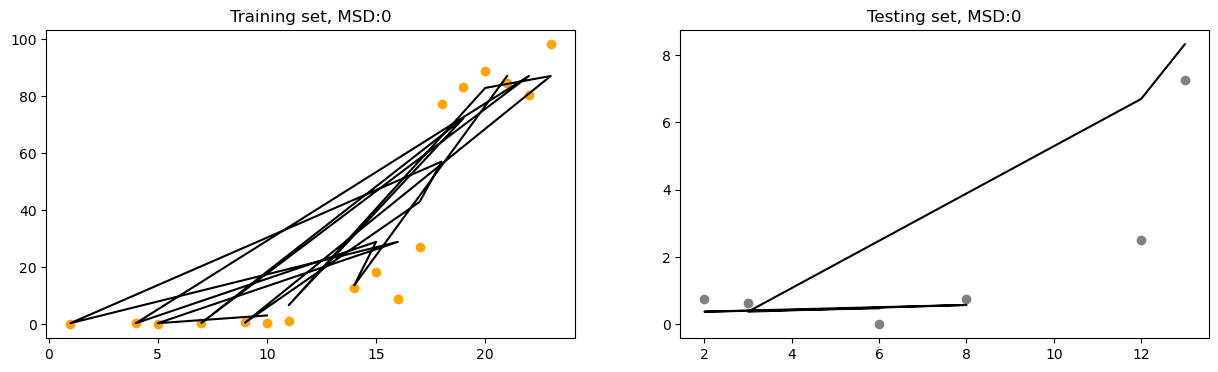

In [641]:
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_prediccion, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_prediccion, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

In [645]:
y_new = KNNR.predict(X)
y_new = mm.inverse_transform(y_new)

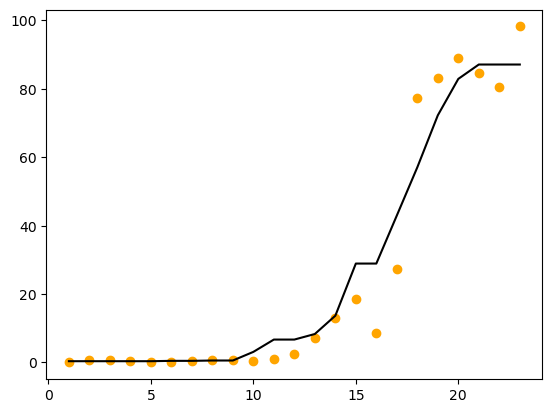

In [646]:
plt.scatter(X, y,  color='orange')
plt.plot(X, y_new, color='black')
#axs.set_title('Todos los datos')

In [694]:
prueba = np.array([24]).reshape(1,-1)
pred = KNNR.predict(prueba)
print(pred)
pred = mm.inverse_transform(pred)
print(pred)
print(pred*4)

[[0.88676845]]
[[87.125]]
[[348.5]]


In [656]:
#No generaliza a futuro

# Regresion Lineal Regularizada

In [761]:
def plot(data2D, target1D, predict1D, titulo):
    plt.figure(figsize=(6, 3))
    plt.plot(data2D, target1D, 'y.', markersize=6, label='Samples')
    plt.plot(data2D, predict1D, 'k-', label='Prediction')
    plt.legend()
    plt.title(titulo)
    plt.grid()
    plt.show()
    return

In [762]:
RGLR = linear_model.Ridge(alpha=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, mm_y, 
                                                    random_state = 10)
RGLR.fit(X_train, y_train)

Ridge(alpha=0.3)

In [763]:
print("Slope: "+str(RGLR.coef_)+", intercept:"+str(RGLR.intercept_))

Slope: [[0.05122523]], intercept:[-0.34965003]


In [764]:
y_train_prediccion = RGLR.predict(X_train)  #Realizar predicciones
y_test_prediccion = RGLR.predict(X_test)

In [765]:
train_MSD = mean_squared_error(y_train, y_train_prediccion)
test_MSD = mean_squared_error(y_test, y_test_prediccion)
print(train_MSD)
print(test_MSD)

0.0417636497732591
0.03777308497485577


In [766]:
r2 = RGLR.score(X, mm_y)
r2

0.6994822843536123

In [767]:
y_new = RGLR.predict(X)
y_new = mm.inverse_transform(y_new)

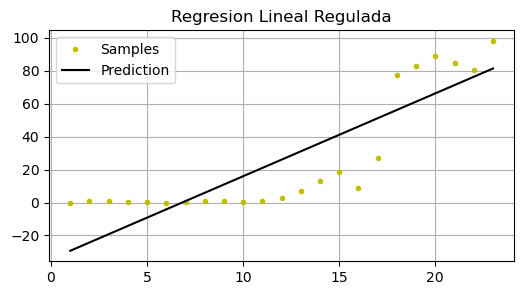

In [768]:
plot(X, y, y_new, titulo = 'Regresion Lineal Regulada')

In [769]:
prueba = np.array([24]).reshape(1,-1)
pred = RGLR.predict(prueba)
print(pred)
pred = mm.inverse_transform(pred)
print(pred)
print(pred*4)

[[0.87975556]]
[[86.43598408]]
[[345.74393634]]


# Regresion Lineal Lasso

In [770]:
from sklearn.linear_model import Lasso

In [771]:
labels = ('Cada 4 dias')

In [772]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In [773]:
print("Slope: "+str(lasso.coef_)+", intercept: "+str(lasso.intercept_))

Slope: [0.0442779], intercept: [-0.25483933]


In [774]:
y_train_prediccion = lasso.predict(X_train)  #Realizar predicciones
y_test_prediccion = lasso.predict(X_test)

In [775]:
train_MSD = mean_squared_error(y_train, y_train_prediccion)
test_MSD = mean_squared_error(y_test, y_test_prediccion)
print(train_MSD)
print(test_MSD)

0.04385413071183771
0.029881146045166673


In [776]:
r2 = lasso.score(X, y)
r2

-0.48800888319187763

In [777]:
y_pred = lasso.predict(X)
y_pred = mm.inverse_transform(y_pred.reshape(-1,1))

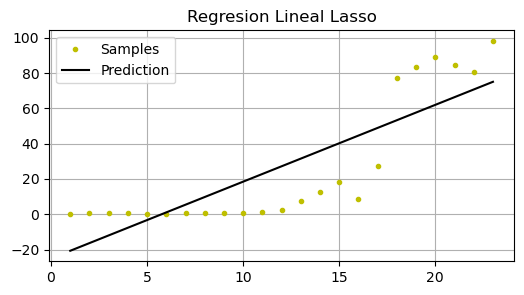

In [778]:
plot(X, y, y_pred, titulo = 'Regresion Lineal Lasso')

In [779]:
prueba = np.array([24]).reshape(1,-1)
pred = RGLR.predict(prueba)
print(pred)
pred = mm.inverse_transform(pred)
print(pred)
print(pred*4)

[[0.87975556]]
[[86.43598408]]
[[345.74393634]]


# Elastic Net

In [782]:
from sklearn.linear_model import ElasticNet

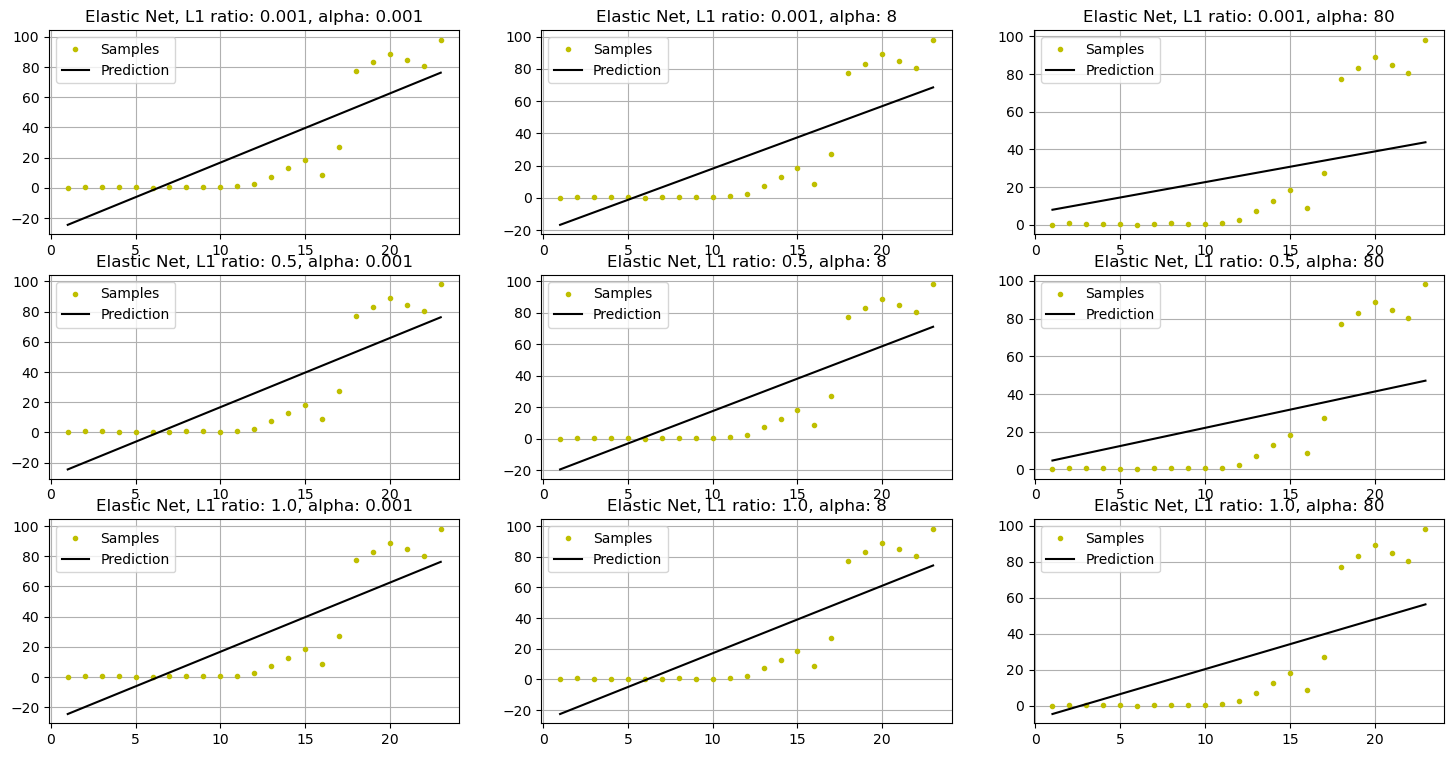

In [784]:
fig, axs = plt.subplots(3,3, figsize=(18,9))

def plot(data2D, target1D, predict1D, row, column, title):
    axs[row,column].plot(data2D, target1D, 'y.', markersize=6,
                         label='Samples')
    axs[row,column].plot(data2D, predict1D, 'k-', label='Prediction')
    axs[row,column].legend()
    axs[row,column].set_title('Elastic Net, '+title)
    axs[row,column].grid()
    return

for l1_ratio, row in zip([0.001,0.5,1.0], [0,1,2]):
    for alpha, column in zip([0.001,8,80], [0,1,2]):
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic.fit(X, y)
        y_pred = elastic.predict(X)
        plot(X, y, y_pred, row, column, 'L1 ratio: '+str(l1_ratio)+', alpha: '+str(alpha))